# Life Expectancy Data

# Import Required Libraries

In [311]:
import numpy as np
import pandas as pd

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#For splitting data
from sklearn.model_selection import train_test_split

#For training
from sklearn.linear_model import LinearRegression


#For model Evaluation
from sklearn import metrics
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [312]:
life_exp = pd.read_csv("/home/nana-ansah-adomako/Documents/NIMS/stats_for_ds/life_Expectancy.csv")
life_exp.head()

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [313]:
life_exp = life_exp.drop(columns = ["Population", "percentage.expenditure", "Country", "Year"])

## Exploring the data

#### missing value imputation

In [316]:
life_exp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2938 non-null   object 
 1   Life.expectancy                  2928 non-null   float64
 2   Adult.Mortality                  2928 non-null   float64
 3   infant.deaths                    2938 non-null   int64  
 4   Alcohol                          2744 non-null   float64
 5   Hepatitis.B                      2385 non-null   float64
 6   Measles                          2938 non-null   int64  
 7   BMI                              2904 non-null   float64
 8   under.five.deaths                2938 non-null   int64  
 9   Polio                            2919 non-null   float64
 10  Total.expenditure                2712 non-null   float64
 11  Diphtheria                       2919 non-null   float64
 12  HIV.AIDS            

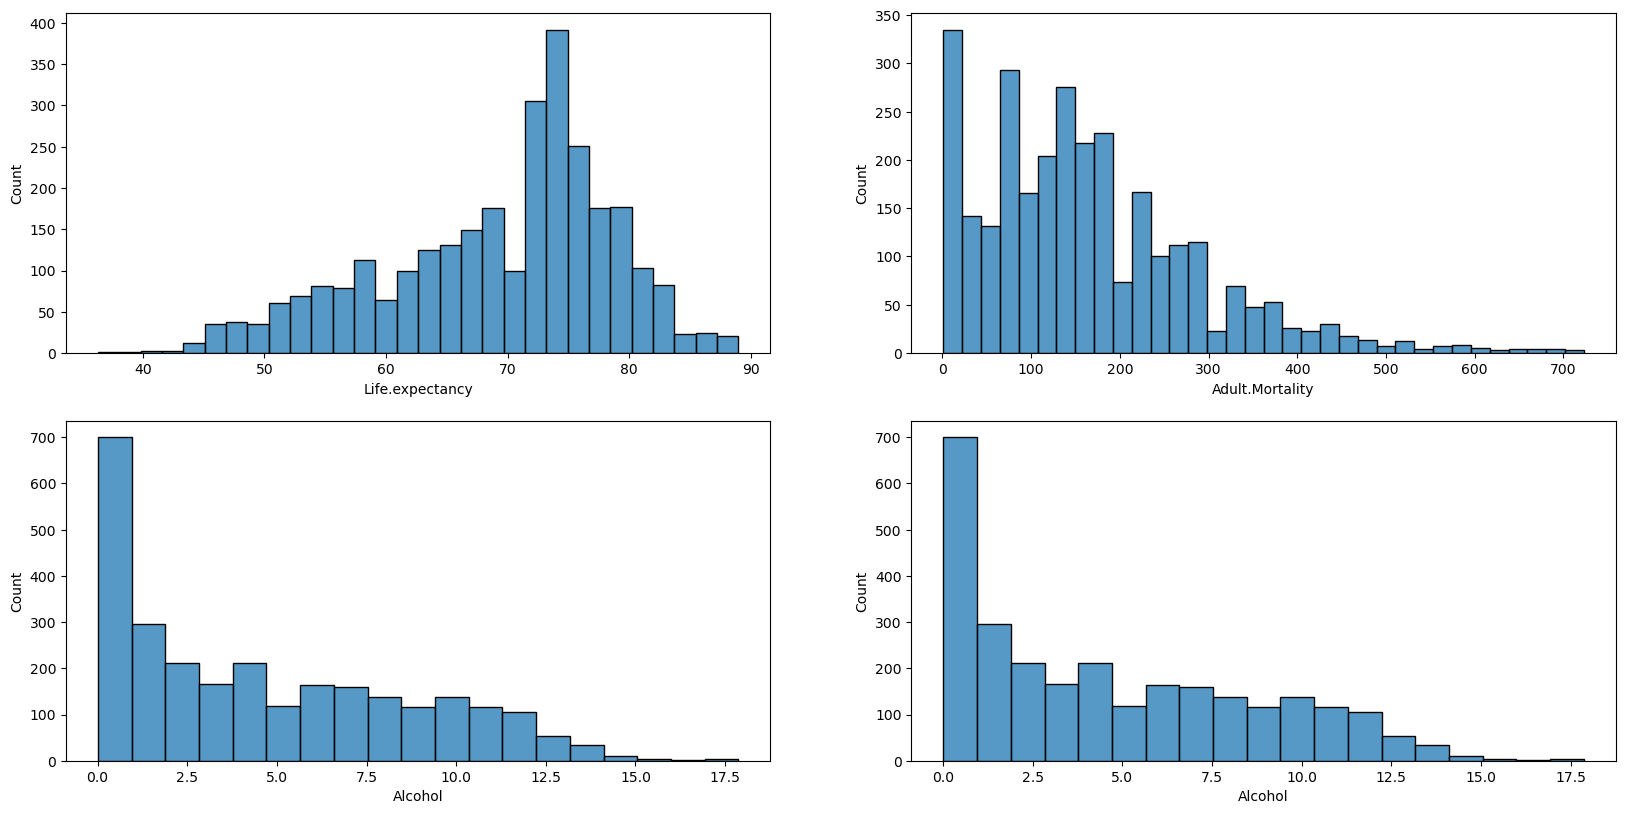

In [317]:
plt.figure(figsize=(20, 15))
plt.subplot(321)
sns.histplot(life_exp["Life.expectancy"])
plt.subplot(322)
sns.histplot(life_exp["Adult.Mortality"])
plt.subplot(323)
sns.histplot(life_exp["Alcohol"])
plt.subplot(324)
sns.histplot(life_exp["Alcohol"])
plt.show()

######## since most of the numerical data doesn't look normal, I choose using the median as the imputation method

In [319]:
life_exp["Life.expectancy"].fillna(life_exp["Life.expectancy"].median(), inplace=True)
life_exp["Adult.Mortality"].fillna(life_exp["Adult.Mortality"].median(), inplace=True)
life_exp["Alcohol"].fillna(life_exp["Alcohol"].median(), inplace=True)
life_exp["Hepatitis.B"].fillna(life_exp["Hepatitis.B"].median(), inplace=True)
life_exp["BMI"].fillna(life_exp["BMI"].median(), inplace=True)
life_exp["Polio"].fillna(life_exp["Polio"].median(), inplace=True)
life_exp["Total.expenditure"].fillna(life_exp["Total.expenditure"].median(), inplace=True)
life_exp["Diphtheria"].fillna(life_exp["Diphtheria"].median(), inplace=True)
life_exp["GDP"].fillna(life_exp["GDP"].median(), inplace=True)
life_exp["Income.composition.of.resources"].fillna(life_exp["Income.composition.of.resources"].median(), inplace=True)
life_exp["Schooling"].fillna(life_exp["Schooling"].median(), inplace=True)
life_exp["thinness..1.19.years"].fillna(life_exp["thinness..1.19.years"].median(), inplace=True)
life_exp["thinness.5.9.years"].fillna(life_exp["thinness.5.9.years"].median(), inplace=True)



In [320]:
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2938 non-null   object 
 1   Life.expectancy                  2938 non-null   float64
 2   Adult.Mortality                  2938 non-null   float64
 3   infant.deaths                    2938 non-null   int64  
 4   Alcohol                          2938 non-null   float64
 5   Hepatitis.B                      2938 non-null   float64
 6   Measles                          2938 non-null   int64  
 7   BMI                              2938 non-null   float64
 8   under.five.deaths                2938 non-null   int64  
 9   Polio                            2938 non-null   float64
 10  Total.expenditure                2938 non-null   float64
 11  Diphtheria                       2938 non-null   float64
 12  HIV.AIDS            

In [321]:
life_exp.describe()

,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,69.234717,164.725664,30.303948,4.546875,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,4.821886,4.852144,0.630362,12.009837
std,9.509115,124.086215,117.926501,3.921946,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,4.397621,4.485854,0.205140,3.265139
min,36.300000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,63.200000,74.000000,0.000000,1.092500,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,1.600000,1.600000,0.504250,10.300000
50%,72.100000,144.000000,3.000000,3.755000,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,3.300000,3.300000,0.677000,12.300000
75%,75.600000,227.000000,22.000000,7.390000,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,7.100000,7.200000,0.772000,14.100000
max,89.000000,723.000000,1800.000000,17.870000,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,27.700000,28.600000,0.948000,20.700000


#####

##### checking for multicollinear variables

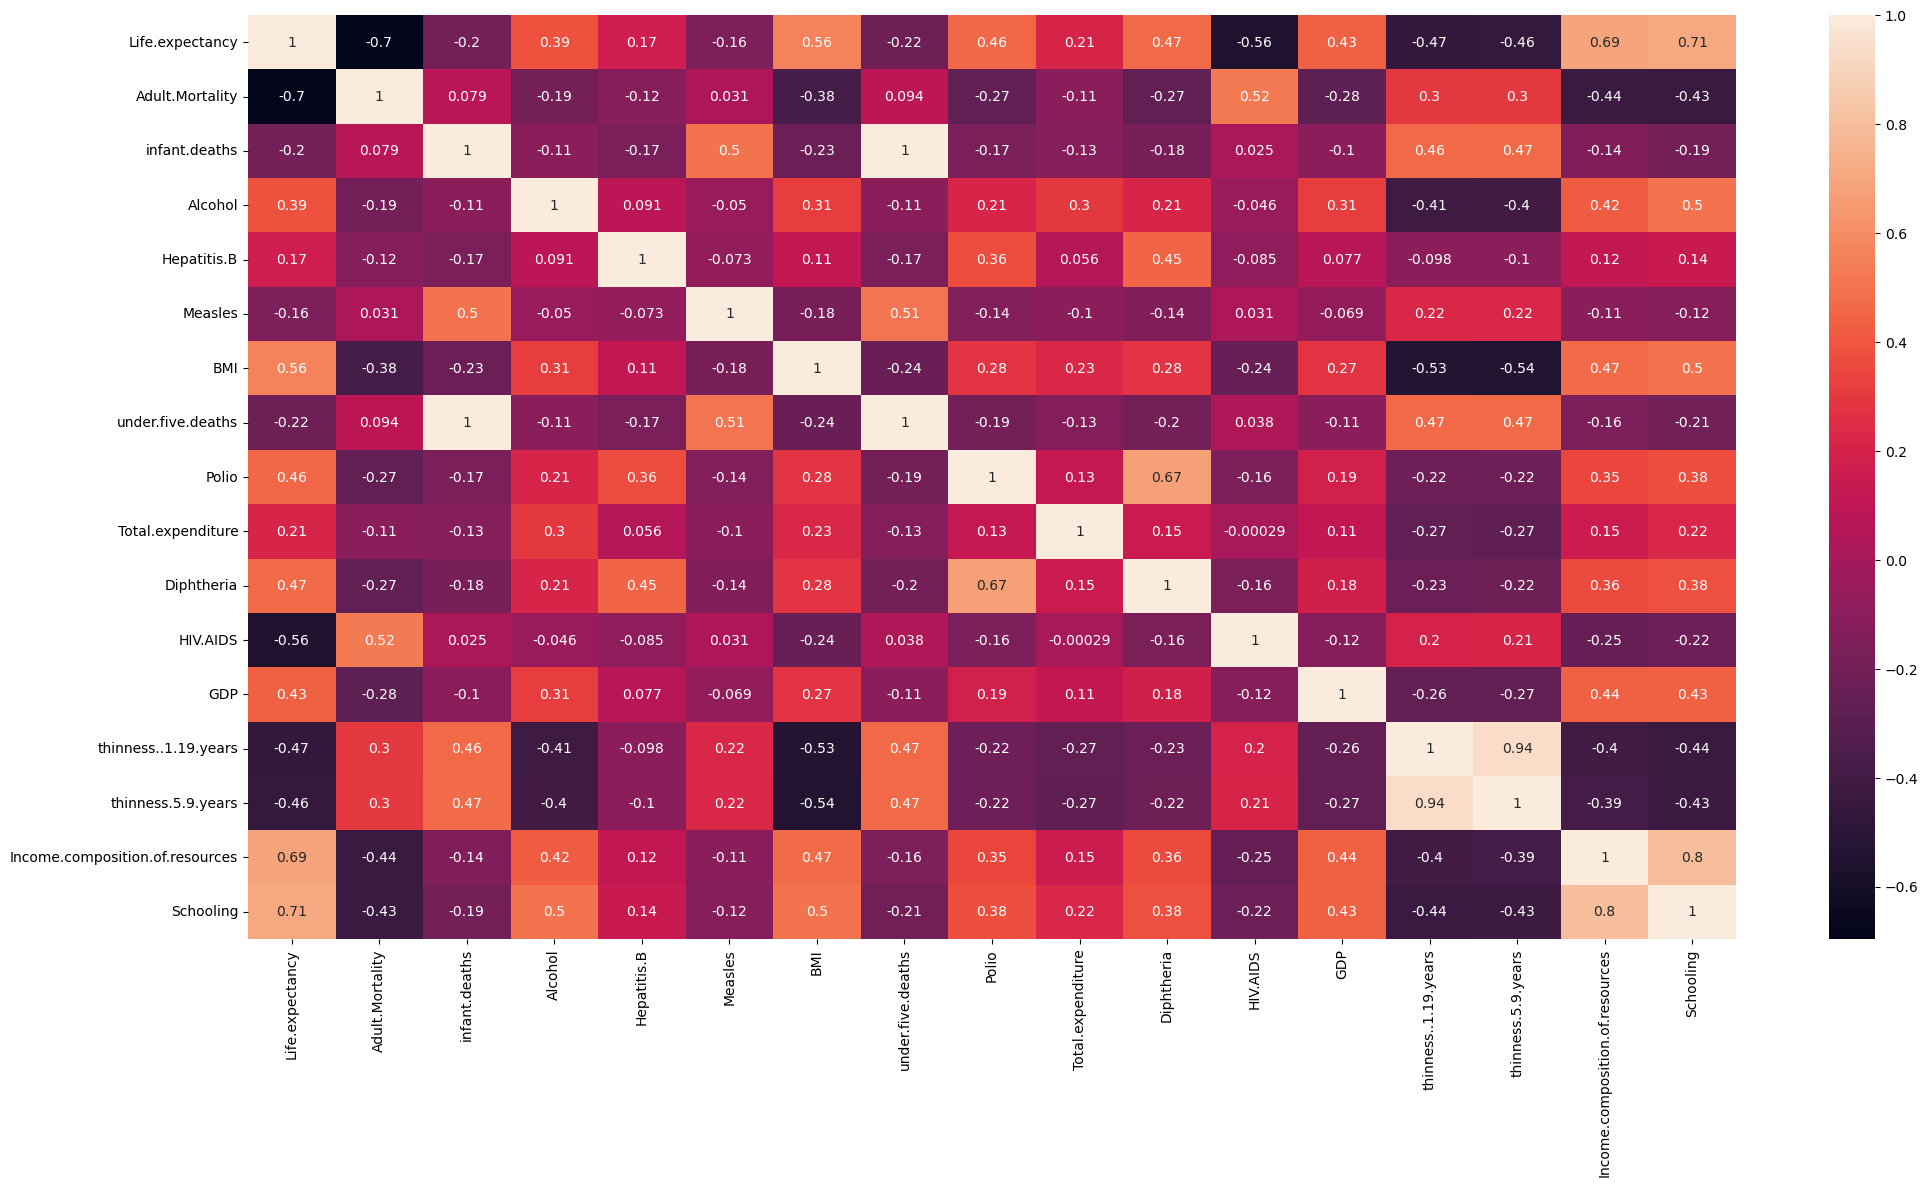

In [324]:
plt.figure(figsize=(24,12)) 
life_exp_corr = life_exp.drop(columns = ["Status"]).corr()
sns.heatmap(life_exp_corr, annot= True)
plt.show()

### since under five death variable highly correlates with infant death as much as I expected, we take under five variable out

In [326]:
life_exp = life_exp.drop(columns="under.five.deaths")

In [327]:
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2938 non-null   object 
 1   Life.expectancy                  2938 non-null   float64
 2   Adult.Mortality                  2938 non-null   float64
 3   infant.deaths                    2938 non-null   int64  
 4   Alcohol                          2938 non-null   float64
 5   Hepatitis.B                      2938 non-null   float64
 6   Measles                          2938 non-null   int64  
 7   BMI                              2938 non-null   float64
 8   Polio                            2938 non-null   float64
 9   Total.expenditure                2938 non-null   float64
 10  Diphtheria                       2938 non-null   float64
 11  HIV.AIDS                         2938 non-null   float64
 12  GDP                 

## Model Building

In [329]:
target = "Life.expectancy"
X = life_exp.drop(columns = ["Life.expectancy", "Status"])
y = life_exp[target]

In [330]:
#Splitting into train, validation and test data set
#Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 42
)

In [331]:
model = LinearRegression()
model.fit(X_train, y_train) #fitting model to data

LinearRegression()

In [332]:
test_pred= model.predict(X_test)

In [333]:
rmse = root_mean_squared_error(y_test,test_pred)
print(f" The root mean squared error ={rmse}")

 The root mean squared error =4.06330857797454


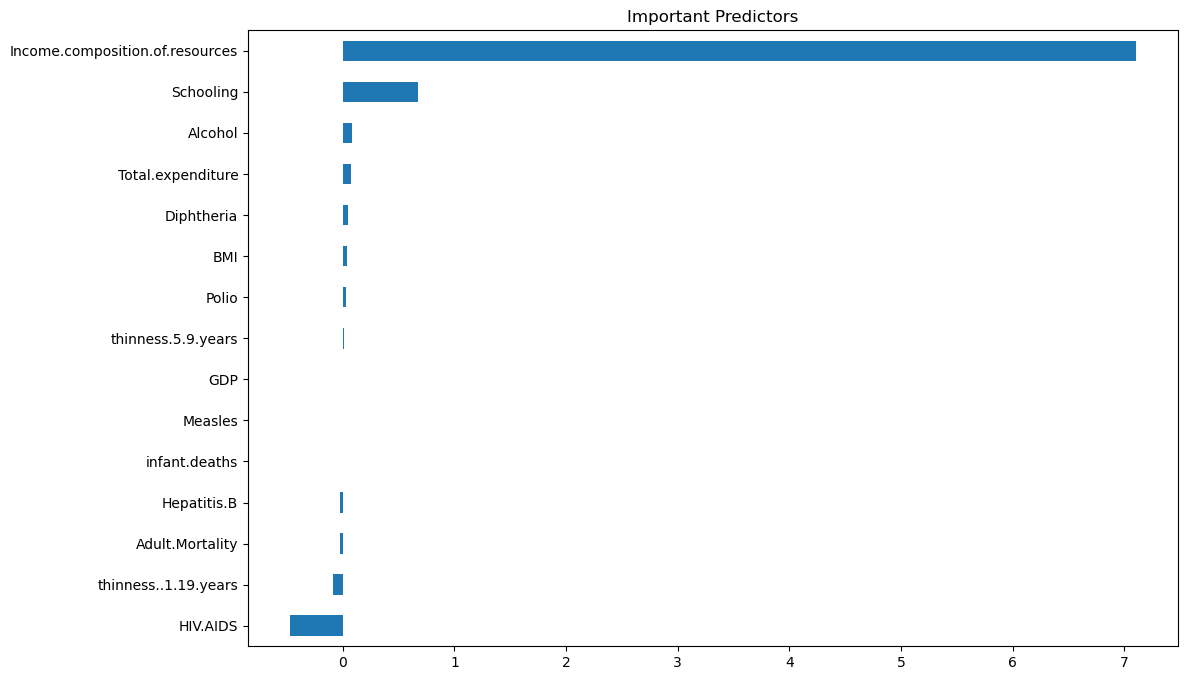

In [334]:
importances = pd.Series(model.coef_, index=X.columns).sort_values()
importances.plot(kind= 'barh', figsize=(12, 8))
plt.title("Important Predictors")
plt.show()

In [335]:
importances.sort_values(ascending=False)

Income.composition.of.resources    7.101414
Schooling                          0.669361
Alcohol                            0.085386
Total.expenditure                  0.073215
Diphtheria                         0.047184
BMI                                0.040699
Polio                              0.031065
thinness.5.9.years                 0.014034
GDP                                0.000051
Measles                           -0.000038
infant.deaths                     -0.000417
Hepatitis.B                       -0.021519
Adult.Mortality                   -0.021669
thinness..1.19.years              -0.091340
HIV.AIDS                          -0.471115
dtype: float64

### B)

#### From the table and figure right above, the most important predictors are the ones with high regression coefficinets. 
#### They have been arranged from most important to less important

## B)
#### For every unit increase in healthcare expenditure (Total.expendture variable), there is a 7% increase in life expectancy assuming all other variables are held constant

## D)
#### Infant death and Adult mortality has a negative impact on life expectancy. A unit increase in infant or adult mortality leads to a decrease in life expectancy

## E)
#### Alcohol and BMI has a positive linear relationship with life expectancy. A unit increase in the two results in 8.5% and 4% increase respectively in life expectancy. This observation in reality contractdicts biomedical science. 
#### This might be as a result of a lurking or confounding variable

## F)
#### Schooling has a positive linear association with life expectancy.  This observation in reality contradicts biomedical science. The only reason might be as a result of confounding or lurking variables.


## G)
#### Polio Immunization has a positive linear relationship with life expectancy. A unit increase in this variable results in a 3% increase in life expectancy
#### Diphtheria Immunization has a positve relationship with life expectancy too. A unit increase in this variable results in a 4% increase in life expectancy

#### checking the spread of residuals

In [343]:
## Chceking for residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

residuals 

2546    6.961591
650    -0.557032
1740   -2.184376
177    -2.183410
1377    5.014390
          ...   
859     1.459954
1405   -3.626613
962    -2.649613
2658   -1.066331
2272   -0.162444
Name: Life.expectancy, Length: 588, dtype: float64

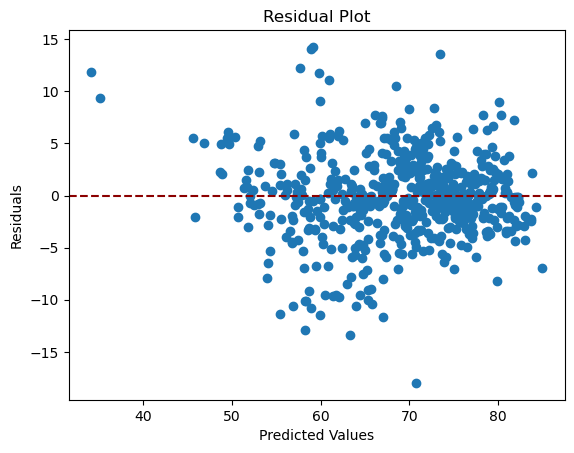

In [344]:
plt.scatter(y_pred, residuals)
plt.axhline(0, color='darkred', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## H) 
#### Model sufffers Heteroskedacity. Because, the residual plot shows a non constant spread of residuals.

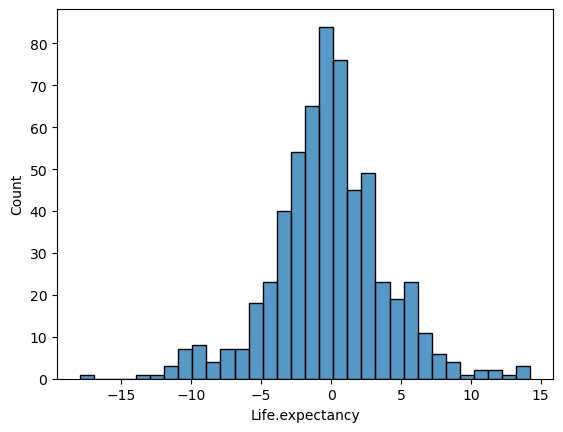

In [346]:
sns.histplot(residuals);

## I)
#### The plot of the residuals does not look fully normal. There is a slight skewness towards the left